In [2]:
#Prpearing data for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

%matplotlib inline

df = pd.read_excel('GlobalData.xls', engine='xlrd') #Here put file path

# this code will show few first lines of code
print(df.head())
# Remove any rows with missing data
df = df.dropna(axis=0, how='any')


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [3]:
# checkin to see if anything is missing within data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [4]:
#Checking what columns there are 
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


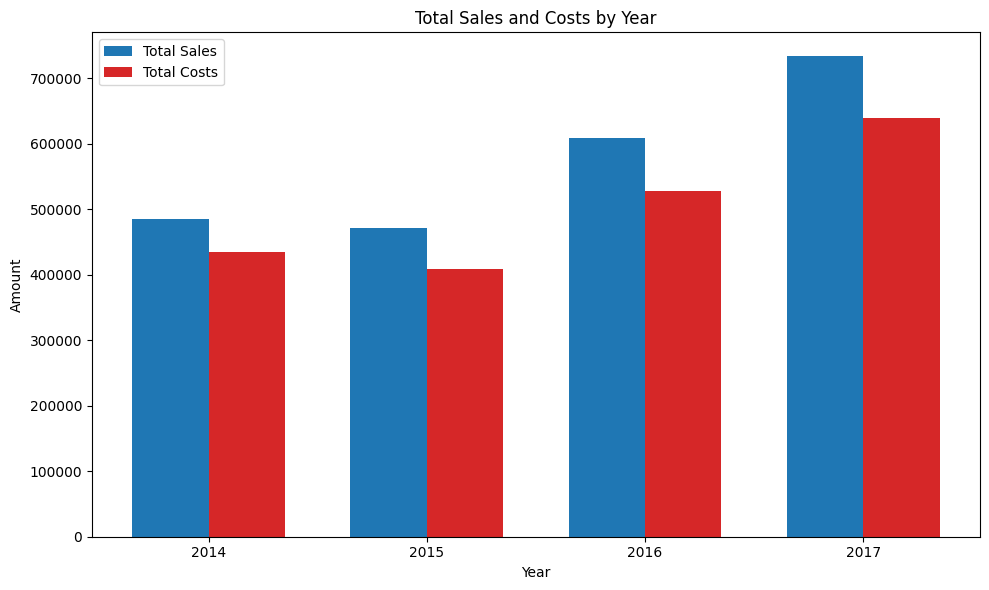

In [5]:
#Start of analysis
df['Cost'] = df['Sales'] - df['Profit']

# Extracting the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Grouping data by year and calculating total sales and costs
total_sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()
total_costs_by_year = df.groupby('Year')['Cost'].sum().reset_index()

# Set the positions and width for the bars
bar_width = 0.35
x = np.arange(len(total_sales_by_year['Year']))

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, total_sales_by_year['Sales'], width=bar_width, color='#1f77b4', label='Total Sales')
plt.bar(x + bar_width/2, total_costs_by_year['Cost'], width=bar_width, color='#d62728', label='Total Costs')

plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total Sales and Costs by Year')
plt.xticks(x, total_sales_by_year['Year'])
plt.legend()

plt.tight_layout()
plt.show()

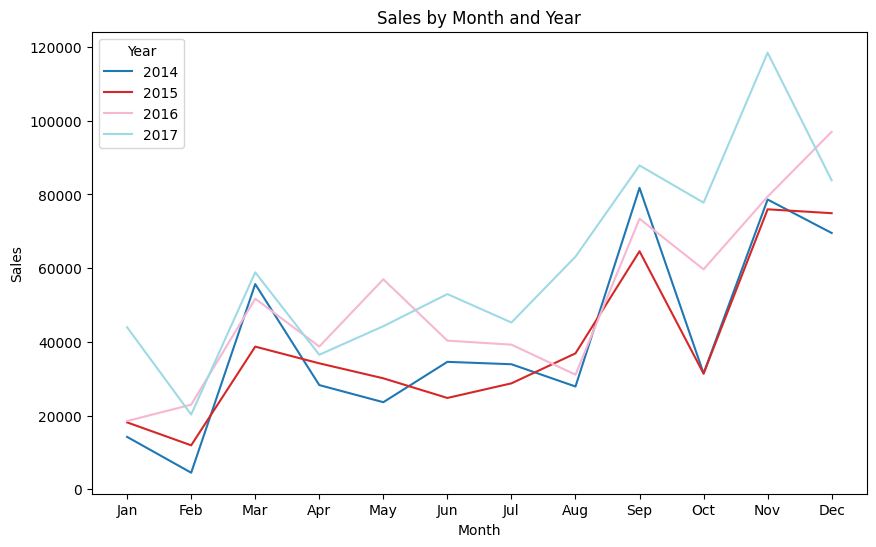

In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Year and Month Column from Order Date
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Grouped by Year and Month, summing up sales
sales_by_month_year = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

colors = plt.get_cmap('tab20', len(sales_by_month_year['Year'].unique()))

for i, year in enumerate(sales_by_month_year['Year'].unique()):
    # Sort data for each year
    year_data = sales_by_month_year[sales_by_month_year['Year'] == year]
    # Plot for each year
    plt.plot(year_data['Month'], year_data['Sales'], label=str(year), color=colors(i))


plt.title('Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(title='Year')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()


In [7]:
bins = [0, 2, 4, 6, 8, 10, 12, 14]
labels = ['0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14']


quantity_ranges = pd.cut(df['Quantity'], bins=bins, labels=labels, right=True)


quantity_counts_df = quantity_ranges.value_counts().reset_index()
quantity_counts_df.columns = ['Quantity_Range', 'Count']

print(quantity_counts_df)


  Quantity_Range  Count
0            2-4   3600
1            0-2   3301
2            4-6   1802
3            6-8    863
4           8-10    315
5          10-12     57
6          12-14     56


Total profit from 2014 to 2017: 286397.02 USD
Total Profit in EUR: 256898.13 EUR
Total Profit in PLN: 1094036.62 PLN


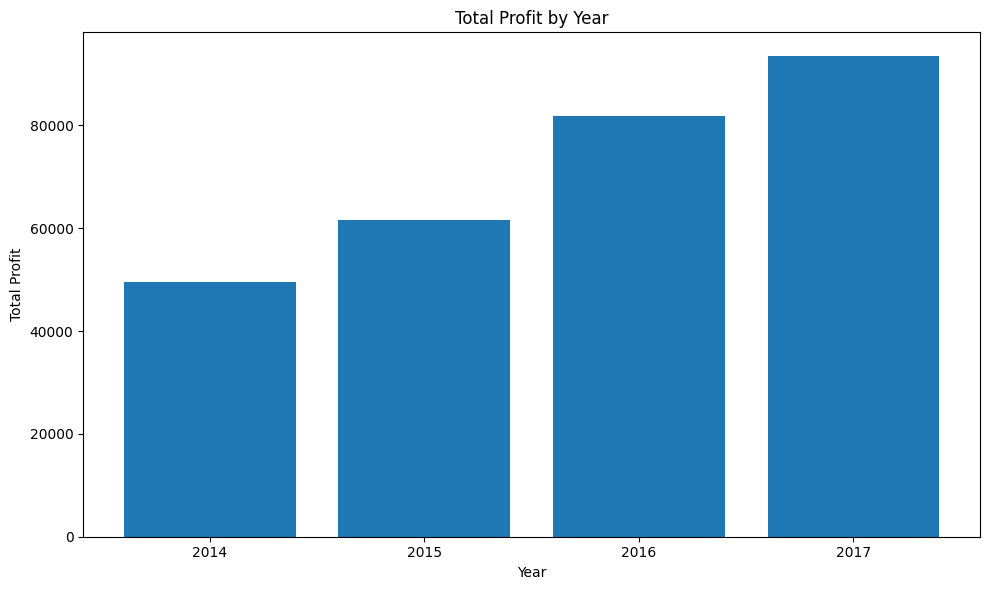

In [8]:
import requests
# Function to get current exchange rates - API integration
def get_exchange_rates():
    url = 'https://api.exchangerate-api.com/v4/latest/USD'
    response = requests.get(url)
    data = response.json()
    return data['rates']['PLN'], data['rates']['EUR']

# Calculate total profit
total_profit = round(df['Profit'].sum(), 2)

# Get current exchange rates
exchange_rate_pln, exchange_rate_eur = get_exchange_rates()

# Convert to PLN and EUR
profit_in_pln = total_profit * exchange_rate_pln
profit_in_eur = total_profit * exchange_rate_eur

# Print values
print(f"Total profit from 2014 to 2017: {total_profit} USD")
print(f'Total Profit in EUR: {round(profit_in_eur, 2)} EUR')
print(f'Total Profit in PLN: {round(profit_in_pln, 2)} PLN')

# PLOT
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extracting the year from the 'Order Date' column
df['Year'] = df['Order Date'].dt.year

# Grouping data by year and calculating total profit
total_profit_by_year = df.groupby('Year')['Profit'].sum().reset_index()

# Creating a bar chart for total profit by year
plt.figure(figsize=(10, 6))
plt.bar(total_profit_by_year['Year'], total_profit_by_year['Profit'], color='#1f77b4')

# Setting X-axis to show years as integer values
plt.xticks(total_profit_by_year['Year'])

plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Total Profit by Year')

plt.tight_layout()
plt.show()


In [9]:
#Return on Investment (ROI) measures the profitability of an investment.
# Calculate total profit
total_profit = df['Profit'].sum()

df['Cost'] = df['Sales'] - df['Profit']
total_costs = df['Cost'].sum()

# Calculate ROI
roi = (total_profit / total_costs) * 100

print(f"Return on Investment (ROI): {round(roi, 2)}%")


Return on Investment (ROI): 14.24%


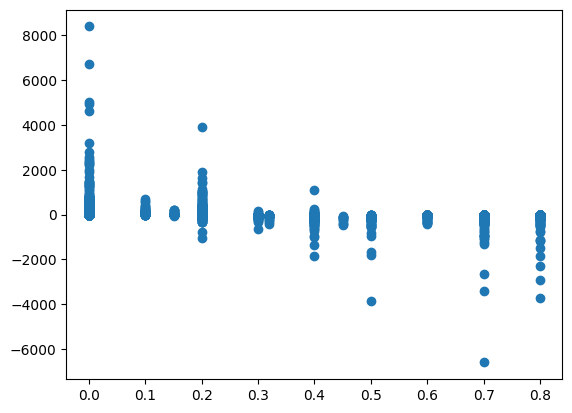

In [10]:
plt.scatter(df["Discount"], df["Profit"])
plt.show()

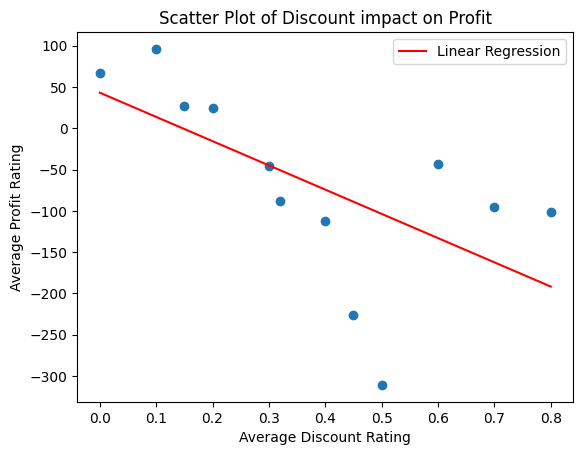

In [11]:
# Avarage profit per discount
df_avg_profit = df.groupby("Discount", as_index=False)["Profit"].mean()

m, b = np.polyfit(df_avg_profit["Discount"], df_avg_profit["Profit"], 1) # y = mx + b
plt.plot(df_avg_profit["Discount"], m * df_avg_profit["Discount"] + b, color='red', label="Linear Regression")

plt.scatter(df_avg_profit["Discount"], df_avg_profit["Profit"])
plt.title("Scatter Plot of Discount impact on Profit")
plt.xlabel("Average Discount Rating")
plt.ylabel("Average Profit Rating")

plt.legend()
plt.show()

In [12]:
#AOV measures the average amount of money spent per order.
# Calculate total sales
total_sales = df['Sales'].sum()

# Calculate the total number of unique orders
total_orders = df['Order ID'].nunique()

# Calculate 
aov = total_sales / total_orders

print(f"Average Order Value (AOV): {round(aov, 2)} USD")


Average Order Value (AOV): 458.61 USD


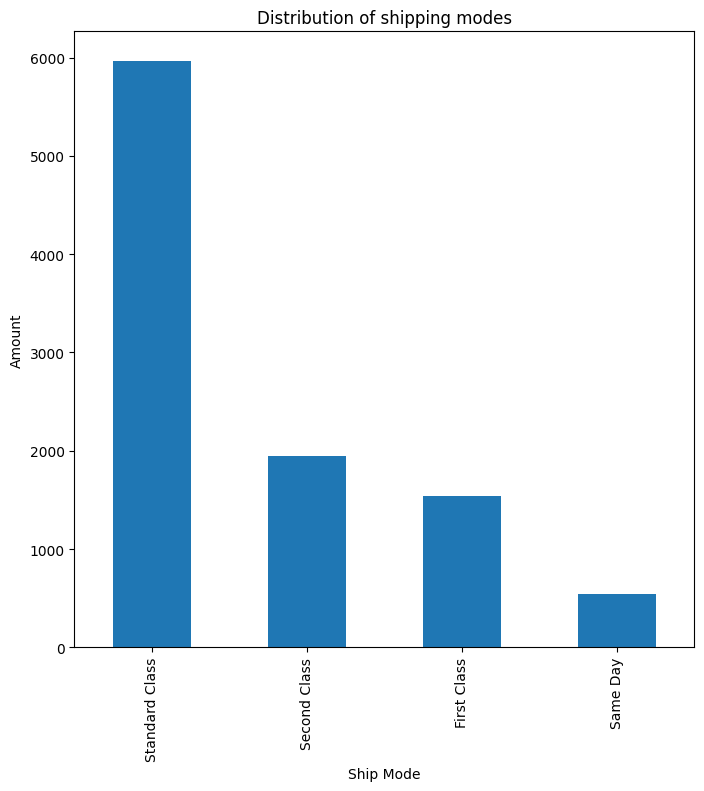

In [13]:
# Count the number of occurrences of each unique value in the 'Ship Mode' column
ship_mode_counts = df['Ship Mode'].value_counts()
# Create a bar plot of these counts
ship_mode_counts.plot(kind='bar', figsize=(8, 8), colormap='tab10')

plt.xlabel('Ship Mode')
plt.ylabel('Amount')
plt.title('Distribution of shipping modes')

plt.show()


In [14]:
profit_by_ship_mode = df.groupby('Ship Mode')['Profit'].sum().reset_index()
print("Profitability by Ship Mode:\n", profit_by_ship_mode)

Profitability by Ship Mode:
         Ship Mode       Profit
0     First Class   48969.8399
1        Same Day   15891.7589
2    Second Class   57446.6354
3  Standard Class  164088.7875


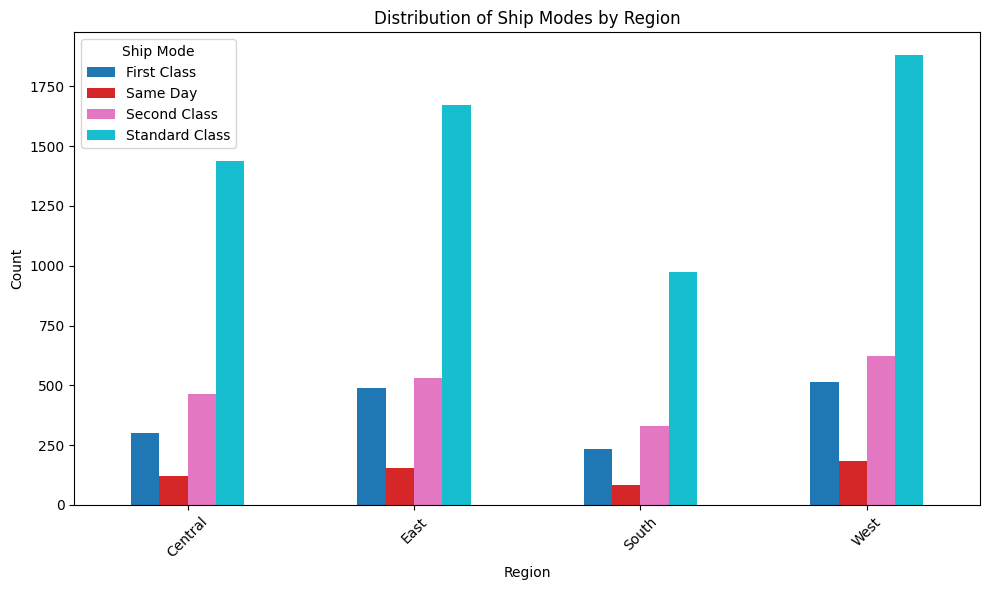

In [15]:
# Group by 'Region' and count occurrences of each 'Ship Mode'
grouped_counts = df.groupby('Region')['Ship Mode'].value_counts()

# Convert the counts to a DataFrame
ship_mode_counts_df = grouped_counts.unstack(fill_value=0)

# Create a bar plot
ax = ship_mode_counts_df.plot(kind='bar', figsize=(10, 6), colormap='tab10')

plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Ship Modes by Region')
plt.legend(title='Ship Mode')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



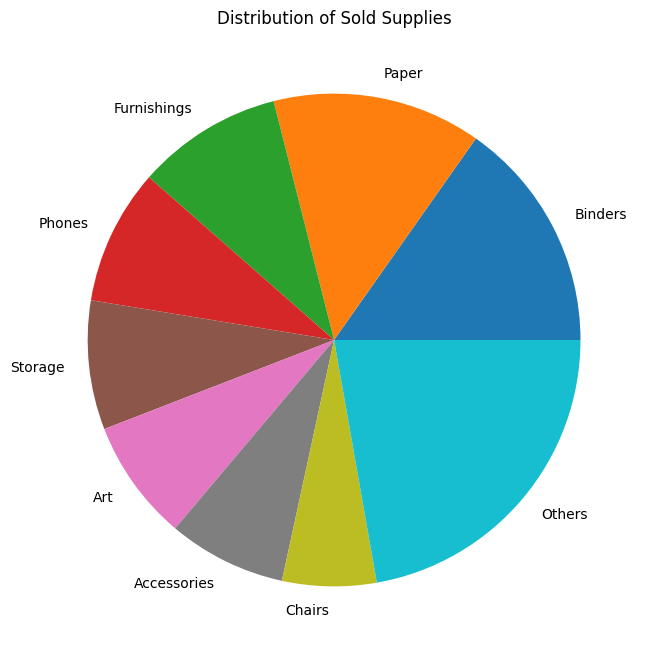

In [16]:
# Count the number of occurrences of each unique value in the 'Sub-Category' column
sub_category_counts = df['Sub-Category'].value_counts()

# Take the top 8 sub-categories and sum the rest into 'Others'
top_8 = sub_category_counts[:8]
others = sub_category_counts[8:].sum()

# Append 'Others' to the top 8
top_8['Others'] = others

# Create a pie plot
top_8.plot(kind='pie', figsize=(8, 8), colormap='tab10')

plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Sold Supplies')

plt.show()

Unique regions: ['South' 'West' 'Central' 'East']
Unique Categories: ['Furniture' 'Office Supplies' 'Technology']


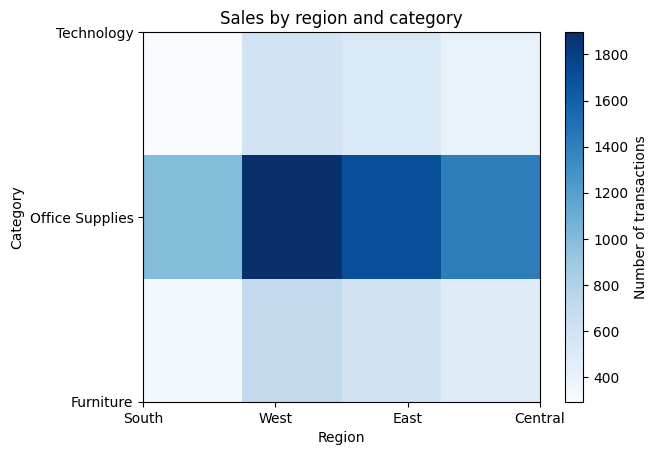

In [17]:
print("Unique regions:", df['Region'].unique())
print("Unique Categories:", df['Category'].unique())

# Change text values on numbers
# Mapping regions
df['Region_num'] = df['Region'].map({'South': 0, 'West': 1, 'East': 2, 'Central': 3})

# Mapping categories
df['Category_num'] = df['Category'].map({'Furniture': 0, 'Office Supplies': 1, 'Technology': 2})

# Hist
plt.hist2d(df['Region_num'], df['Category_num'], bins=[4, 3], cmap='Blues')

plt.colorbar(label='Number of transactions')

plt.xticks(ticks=[0, 1, 2, 3], labels=['South', 'West', 'East', 'Central'])
plt.yticks(ticks=[0, 1, 2], labels=['Furniture', 'Office Supplies', 'Technology'])

plt.xlabel('Region')
plt.ylabel('Category')
plt.title('Sales by region and category')

plt.show()

In [18]:
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
print("Profitability by Region:\n", profit_by_region)

Profitability by Region:
     Region       Profit
0  Central   39706.3625
1     East   91522.7800
2    South   46749.4303
3     West  108418.4489


In [19]:
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()
print("Profitability by Product Category:\n", profit_by_category)

Profitability by Product Category:
           Category       Profit
0        Furniture   18451.2728
1  Office Supplies  122490.8008
2       Technology  145454.9481


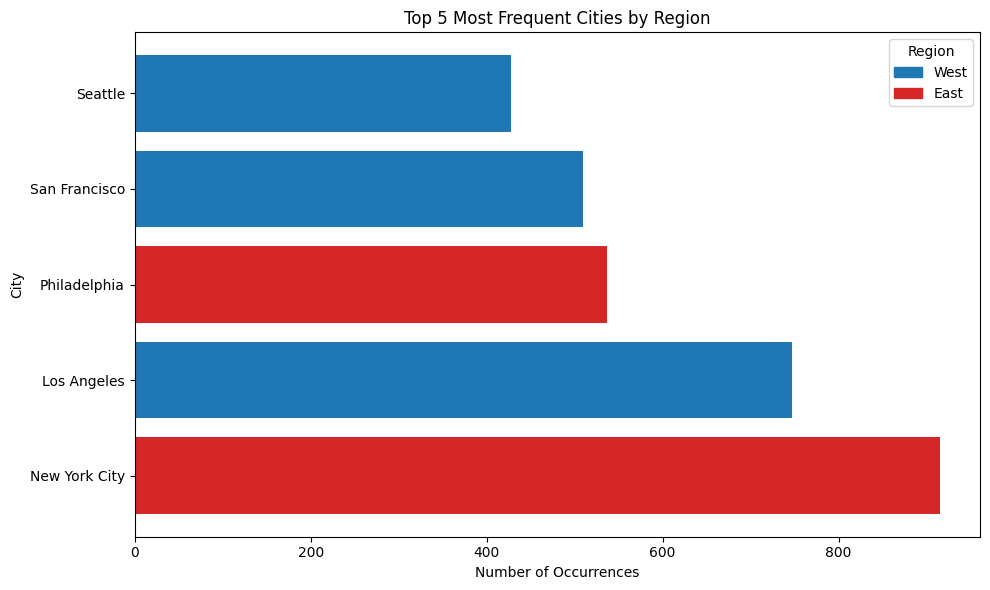

In [20]:
# Finding 5 most common cities
city_counts = df['City'].value_counts()
top_cities = city_counts.head(5).index
df_filtered = df[df['City'].isin(top_cities)]

# Grouping by City and Region, and counting occurrences
city_region_counts = df_filtered.groupby(['City', 'Region']).size().reset_index(name='Count')

# Sorting cities by total occurrences in descending order
city_region_counts = city_region_counts.sort_values(by='Count', ascending=False)

# Function to assign colors based on the region
def get_color(region):
    if region == 'West':
        return '#1f77b4'
    elif region == 'East':
        return '#d62728'
    else:
        return '#90d743'

# Applying the color function to the 'Region' column
city_region_counts['Color'] = city_region_counts['Region'].apply(get_color)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(city_region_counts['City'], city_region_counts['Count'], color=city_region_counts['Color'])

plt.xlabel('Number of Occurrences')
plt.ylabel('City')
plt.title('Top 5 Most Frequent Cities by Region')

# Creating the legend
handles = [
    plt.Rectangle((0,0),1,1, color='#1f77b4', label='West'),
    plt.Rectangle((0,0),1,1, color='#d62728', label='East')
]
plt.legend(handles=handles, title='Region')

plt.tight_layout()
plt.show()


Segments:  ['Consumer' 'Corporate' 'Home Office']


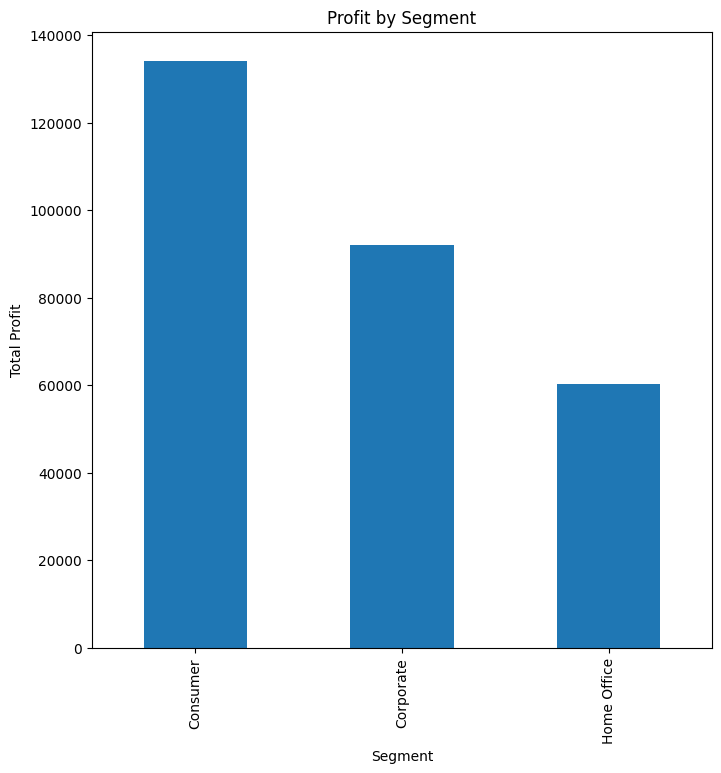

In [21]:
print("Segments: ", df['Segment'].unique())

# Calculate total profit for each segment
segment_profit = df.groupby('Segment')['Profit'].sum()

segment_profit.plot(kind='bar', figsize=(8, 8), color='#1f77b4')

plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Profit by Segment')

plt.show()

In [22]:
profit_by_segment = df.groupby('Segment')['Profit'].sum().reset_index()
print("Profitability by Segment:\n", profit_by_segment)

Profitability by Segment:
        Segment       Profit
0     Consumer  134119.2092
1    Corporate   91979.1340
2  Home Office   60298.6785
